In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

from graphufs.stacked_utils import convert_loss_channel2var, get_channel_index
from graphufs.datasets import Dataset

In [2]:
_scratch = "/pscratch/sd/n/nagarwal/"
_prototype = "cp1"
_expt = "R2"
_prototypes = "/global/homes/n/nagarwal/graph-ufs/prototypes/"

In [3]:
ds = xr.open_dataset(os.path.join(_scratch, _prototype, _expt, "loss.nc"))
ds.load()

<xarray.Dataset> Size: 54MB
Dimensions:                (optim_step: 94880, epoch: 80, channel: 133)
Coordinates:
  * optim_step             (optim_step) int64 759kB 0 1 2 ... 94877 94878 94879
  * epoch                  (epoch) int64 640B 1 2 3 4 5 6 ... 75 76 77 78 79 80
  * channel                (channel) int64 1kB 0 1 2 3 4 ... 128 129 130 131 132
Data variables:
    loss                   (optim_step) float32 380kB 2.031 2.039 ... 0.2019
    loss_by_channel        (optim_step, channel) float32 50MB 0.007968 ... 0....
    loss_by_channel_valid  (epoch, channel) float32 43kB 0.003004 ... 0.003901
    loss_avg               (epoch) float32 320B 0.8032 0.492 ... 0.2048 0.2047
    loss_valid             (epoch) float32 320B 0.5822 0.4658 ... 0.2532 0.2455
    mgrad                  (epoch) float32 320B 8.956e-05 ... 4.198e-05
    g_norm                 (optim_step) float64 759kB nan nan nan ... nan nan
    learning_rate          (optim_step) float32 380kB 0.0 1e-06 ... 0.0 0.0
    epoch_label            (optim_step) float64 759kB 1.0 1.0 1.0 ... 80.0 80.0
Attributes:
    batch_size:  32

In [4]:
# Awry channels
channels = ds.loss_by_channel_valid.where(ds.loss_by_channel_valid>1, drop=True).coords
channels

Coordinates:
  * epoch    (epoch) int64 0B 
  * channel  (channel) int64 0B 

In [4]:
from prototypes.cp1.R2.config import CP1Trainer as Emulator 

In [5]:
# get channel index
em = Emulator()
tds = Dataset(em, mode="training")
xinputs, xtargets, _ = tds.get_xarrays(0)

tmeta_inp = get_channel_index(xinputs)
tmeta = get_channel_index(xtargets)
tmeta

{0: {'varname': 'LW', 'time': 0},
 1: {'varname': 'SSH', 'time': 0},
 2: {'varname': 'SW', 'time': 0},
 3: {'varname': 'dzdt', 'time': 0, 'level': 0},
 4: {'varname': 'dzdt', 'time': 0, 'level': 1},
 5: {'varname': 'dzdt', 'time': 0, 'level': 2},
 6: {'varname': 'dzdt', 'time': 0, 'level': 3},
 7: {'varname': 'dzdt', 'time': 0, 'level': 4},
 8: {'varname': 'dzdt', 'time': 0, 'level': 5},
 9: {'varname': 'dzdt', 'time': 0, 'level': 6},
 10: {'varname': 'dzdt', 'time': 0, 'level': 7},
 11: {'varname': 'dzdt', 'time': 0, 'level': 8},
 12: {'varname': 'dzdt', 'time': 0, 'level': 9},
 13: {'varname': 'dzdt', 'time': 0, 'level': 10},
 14: {'varname': 'dzdt', 'time': 0, 'level': 11},
 15: {'varname': 'dzdt', 'time': 0, 'level': 12},
 16: {'varname': 'dzdt', 'time': 0, 'level': 13},
 17: {'varname': 'dzdt', 'time': 0, 'level': 14},
 18: {'varname': 'dzdt', 'time': 0, 'level': 15},
 19: {'varname': 'icec', 'time': 0},
 20: {'varname': 'icetk', 'time': 0},
 21: {'varname': 'pressfc', 'time': 0},

In [6]:
# covert channel loss to var loss
var_loss = convert_loss_channel2var(Emulator, ds.loss_by_channel)
var_loss

<xarray.Dataset> Size: 51MB
Dimensions:     (optim_step: 94880, level: 16, z_l: 10)
Coordinates:
  * optim_step  (optim_step) int64 759kB 0 1 2 3 4 ... 94876 94877 94878 94879
  * level       (level) float64 128B 226.1 676.2 773.6 ... 825.8 922.6 572.7
  * z_l         (z_l) float64 80B 0.5154 2.765 7.648 15.95 ... 152.1 271.2 417.7
Data variables: (12/22)
    LW          (optim_step) float32 380kB 0.007968 0.008222 ... 0.001054
    SSH         (optim_step) float32 380kB 0.00618 0.006364 ... 0.001018 0.00096
    SW          (optim_step) float32 380kB 0.0243 0.02528 ... 8.076e-05
    dzdt        (level, optim_step) float32 6MB 0.01504 0.01565 ... 0.02611
    icec        (optim_step) float32 380kB 0.00616 0.006712 ... 0.002572
    icetk       (optim_step) float32 380kB 0.006689 0.006322 ... 0.002431
    ...          ...
    ugrd        (level, optim_step) float32 6MB 0.01107 0.01121 ... 0.000724
    ugrd10m     (optim_step) float32 380kB 0.009217 0.009485 ... 0.000721
    uo          (z_l, optim_step) float32 4MB 0.01314 0.01282 ... 0.002315
    vgrd        (level, optim_step) float32 6MB 0.01095 0.01151 ... 0.0005858
    vgrd10m     (optim_step) float32 380kB 0.01372 0.01372 ... 0.0006306
    vo          (z_l, optim_step) float32 4MB 0.009879 0.00982 ... 0.002331

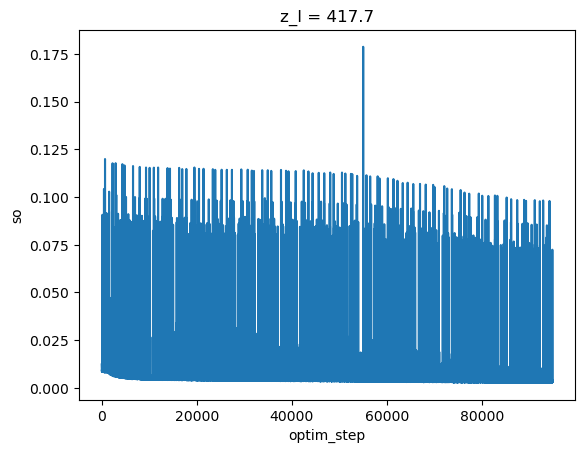

In [31]:
var_loss["so"].isel(z_l=-1).plot()
plt.show()

In [10]:
# check the training dataset
tds_inp = xr.open_zarr(os.path.join(_scratch, _prototype, _expt, "training", "inputs.zarr"))
tds_tar = xr.open_zarr(os.path.join(_scratch, _prototype, _expt, "training", "targets.zarr"))

In [11]:
# see the channel corresponding to temp and so in inputs
tmeta_inp

{0: {'varname': 'LW', 'time': 0},
 1: {'varname': 'LW', 'time': 1},
 2: {'varname': 'SSH', 'time': 0},
 3: {'varname': 'SSH', 'time': 1},
 4: {'varname': 'SW', 'time': 0},
 5: {'varname': 'SW', 'time': 1},
 6: {'varname': 'day_progress_cos', 'time': 0},
 7: {'varname': 'day_progress_cos', 'time': 1},
 8: {'varname': 'day_progress_sin', 'time': 0},
 9: {'varname': 'day_progress_sin', 'time': 1},
 10: {'varname': 'dswrf_avetoa', 'time': 0},
 11: {'varname': 'dswrf_avetoa', 'time': 1},
 12: {'varname': 'dzdt', 'time': 0, 'level': 0},
 13: {'varname': 'dzdt', 'time': 0, 'level': 1},
 14: {'varname': 'dzdt', 'time': 0, 'level': 2},
 15: {'varname': 'dzdt', 'time': 0, 'level': 3},
 16: {'varname': 'dzdt', 'time': 0, 'level': 4},
 17: {'varname': 'dzdt', 'time': 0, 'level': 5},
 18: {'varname': 'dzdt', 'time': 0, 'level': 6},
 19: {'varname': 'dzdt', 'time': 0, 'level': 7},
 20: {'varname': 'dzdt', 'time': 0, 'level': 8},
 21: {'varname': 'dzdt', 'time': 0, 'level': 9},
 22: {'varname': 'dzdt

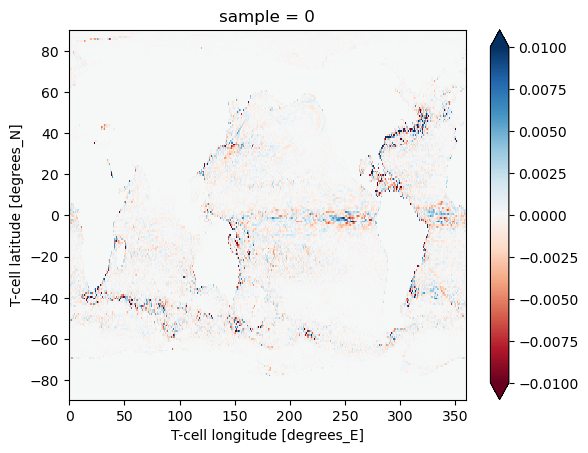

In [34]:
# difference in salinity target minus initial condition
diff = tds_tar.targets.isel(sample=0, channels=31) - tds_inp.inputs.isel(sample=0, channels=80)
diff.plot(vmin=-0.01, vmax=0.01, cmap="RdBu")
plt.show()

In [13]:
# check the statistics for deeper level salinity
statfile = "diffs_stddev_by_level.zarr"
stat = xr.open_zarr(os.path.join(_scratch, _prototype, _expt, "normalization", "coupled", statfile))
stat

<xarray.Dataset> Size: 928B
Dimensions:            (level: 16, z_l: 10)
Coordinates:
  * level              (level) float64 128B 226.1 277.8 327.7 ... 922.6 974.3
  * z_l                (z_l) float64 80B 0.5154 2.765 7.648 ... 271.2 417.7
Data variables: (12/27)
    LW                 float32 4B ...
    SSH                float32 4B ...
    SW                 float32 4B ...
    day_progress_cos   float32 4B ...
    day_progress_sin   float32 4B ...
    dswrf_avetoa       float32 4B ...
    ...                 ...
    uo                 (z_l) float64 80B dask.array<chunksize=(1,), meta=np.ndarray>
    vgrd               (level) float32 64B dask.array<chunksize=(16,), meta=np.ndarray>
    vgrd10m            float32 4B ...
    vo                 (z_l) float64 80B dask.array<chunksize=(1,), meta=np.ndarray>
    year_progress_cos  float64 8B ...
    year_progress_sin  float64 8B ...

In [14]:
stat.so.isel(z_l=-1).values

array(0.00122611)

In [57]:
stat.so.isel(z_l=0).values/stat.so.isel(z_l=-1).values

np.float64(24.055956985516143)

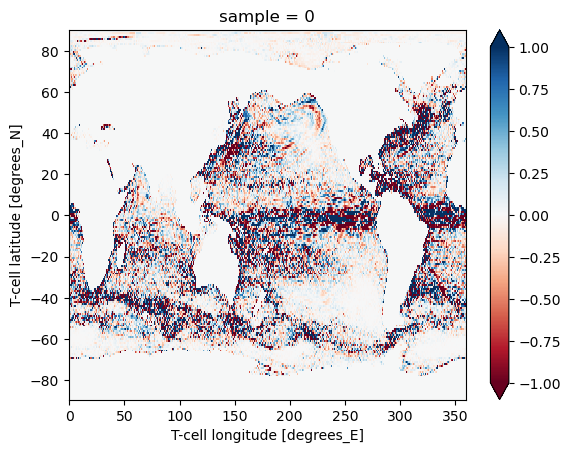

In [32]:
normalized_diff = diff/stat.so.isel(z_l=-1).values
normalized_diff.plot(cmap="RdBu", vmax=1, vmin=-1)
plt.show()

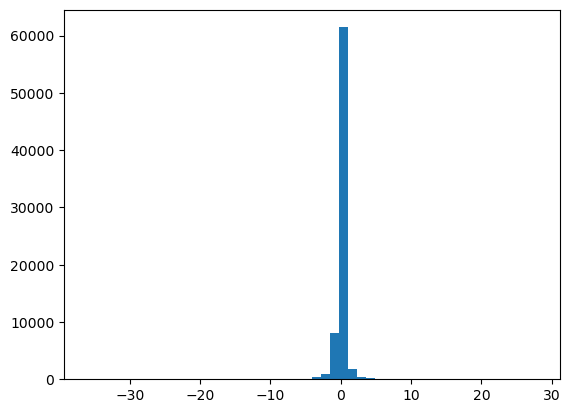

In [27]:
plt.hist(np.ravel(normalized_diff[:,:]), 50,)
plt.show()

In [25]:
192*384

73728